In [ ]:
import matplotlib
import dotenv
from pathlib import Path
import os
import json
import matplotlib.pyplot as plt
import pandas as pd
import re

base_dir = Path.cwd()
data_dir = base_dir / "data"
ro_dir = data_dir / "judete"
md_dir = data_dir / "raioane"

In [14]:
def basic_text_analysis(texts, dataset_name="dataset"):
    assert isinstance(texts, list)
    assert all(isinstance(t, str) for t in texts)

    def word_count(t):
        return len(t.split())

    def sentence_count(t):
        return len(re.findall(r'[.!?]+', t))

    data = {
        "char_len": [len(t) for t in texts],
        "word_count": [word_count(t) for t in texts],
        "sentence_count": [sentence_count(t) for t in texts],
    }

    df = pd.DataFrame(data)

    summary = {
        "dataset": dataset_name,
        "num_texts": len(texts),
        "char_len_mean": df.char_len.mean(),
        "char_len_median": df.char_len.median(),
        "word_count_mean": df.word_count.mean(),
        "word_count_median": df.word_count.median(),
        "sentence_count_mean": df.sentence_count.mean(),
    }

    return df, summary

In [15]:
def plot_distributions(df, dataset_name="dataset"):
    plt.figure()
    plt.hist(df["char_len"], bins=50)
    plt.title(f"Character Length Distribution — {dataset_name}")
    plt.xlabel("Characters")
    plt.ylabel("Frequency")
    plt.show()

    plt.figure()
    plt.hist(df["word_count"], bins=50)
    plt.title(f"Word Count Distribution — {dataset_name}")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.show()

    plt.figure()
    plt.boxplot(df["word_count"])
    plt.title(f"Word Count Boxplot — {dataset_name}")
    plt.ylabel("Words")
    plt.show()


In [19]:
def get_data_summary(data: Data, name:str):
    df, summary = basic_text_analysis(data.files, dataset_name=name)
    plot_distributions(df, dataset_name=name)

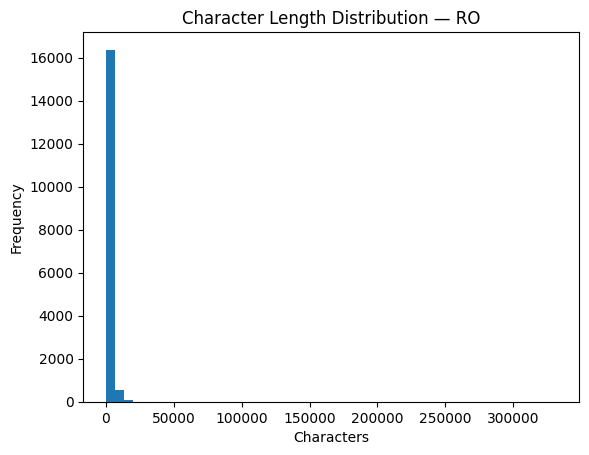

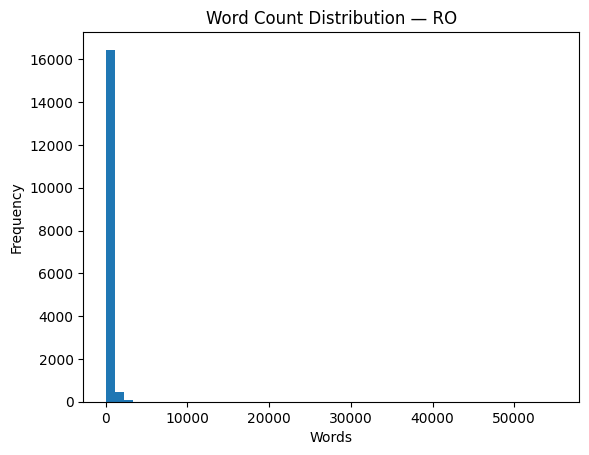

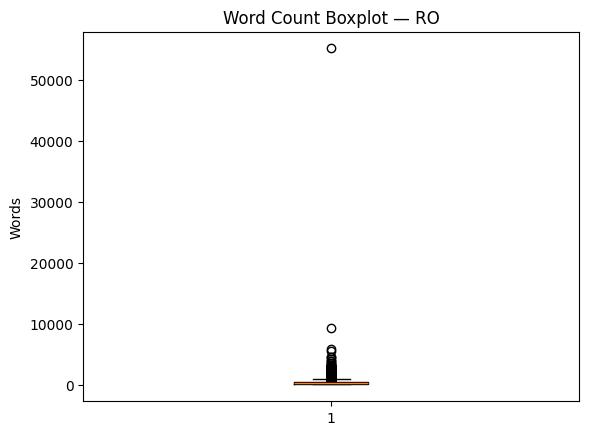

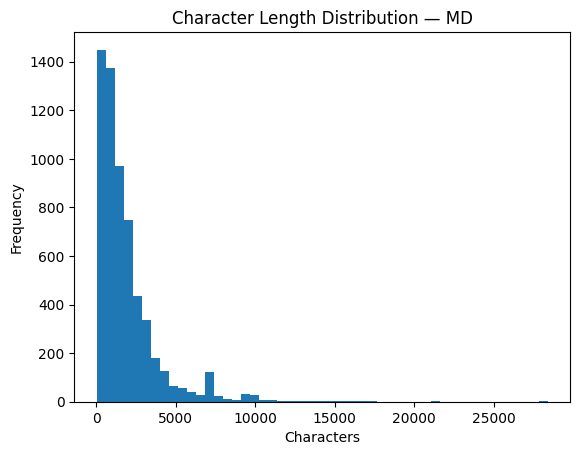

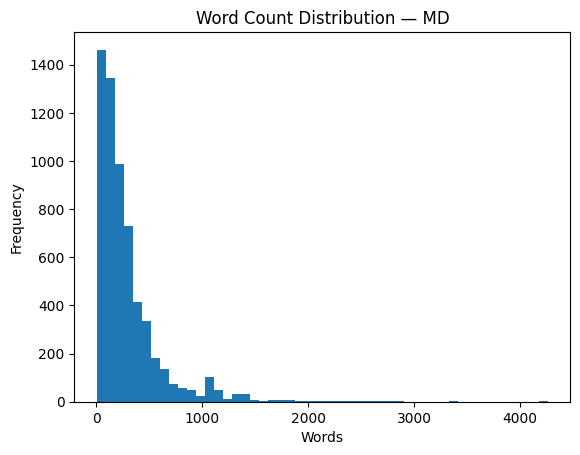

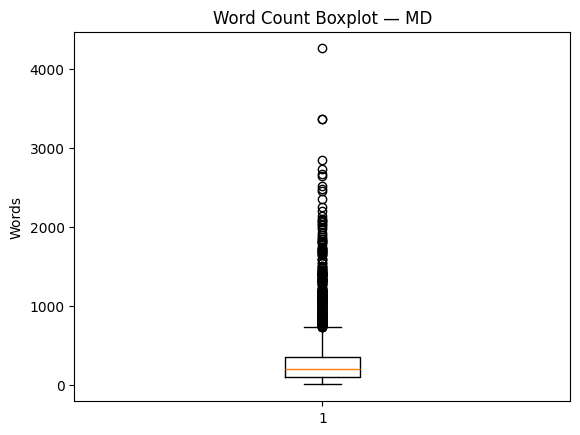

In [20]:
ro_data = Data(ro_dir)
md_data = Data(md_dir)

get_data_summary(ro_data, "RO")
get_data_summary(md_data, "MD")